In [1]:
import torch
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pylab
from matplotlib.font_manager import FontProperties
import os

# Automatic parameter grid search: emsize nhids nlayers

In [5]:
%%writefile grid.py
import os
emsizes = [100,500,1000]
nhids = [100,500,1000]
nlayers = [2,3]
models = ['LSTM']
epochs = 30
for model in models:
    for emsize in emsizes:
        for nhid in nhids:
            for nlayer in nlayers:
                save_path = '../../datasets/saved_models/%s_%s_%s_%s_%sepcs.pt' %(model,nlayer,emsize,nhid,epochs)
                info_path = '../../datasets/info_dict/%s_%s_%s_%s_%sepcs.pk' %(model,nlayer,emsize,nhid,epochs)
                cmdLine = 'python main.py --cuda --epochs %s --batch-size 200 --model %s --nlayers %s --emsize %s --nhid %s\
                --save %s --infopath %s'%(epochs,model,nlayer,emsize,nhid,save_path,info_path)
                print(cmdLine)
                os.system(cmdLine)

Overwriting grid.py


In [10]:
# Load outputed info_dict
def valHist_HiddenGap(directory,title='Validation Loss History',save=False,legend_out = False):
    files_list = os.listdir(directory)
    for filename in files_list:
        nhid = int(filename.split('_')[3])
        filepath = directory+filename
        with open(filepath,'rb') as f:
            info_dict = pickle.load(f)
            val_loss_hist = np.exp(info_dict['val_losses'])
            test_loss = np.exp(info_dict['test_losses'][0])
            if nhid ==100:
                plt.plot(np.arange(len(val_loss_hist)),val_loss_hist,label=filename+' %.2f '%(test_loss),ls='--')
            else:
                plt.plot(np.arange(len(val_loss_hist)),val_loss_hist,label=filename+' %.2f '%(test_loss))
    plt.xlabel('Epochs')
    plt.ylabel('Exp(Validation Loss)')
    #plt.xlim([0,30])
    #plt.ylim([120,180])
    plt.legend(loc='best')
    if legend_out:
        pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
    plt.title(title)
    if save:
        plt.savefig('%s.png'%(title))
    plt.show()
    return 

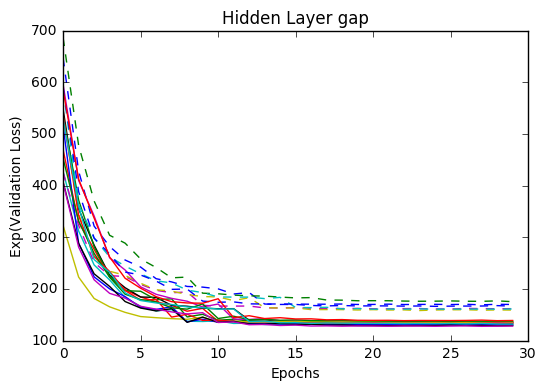

In [7]:
valHist('info_dict/','Hidden Layer gap')

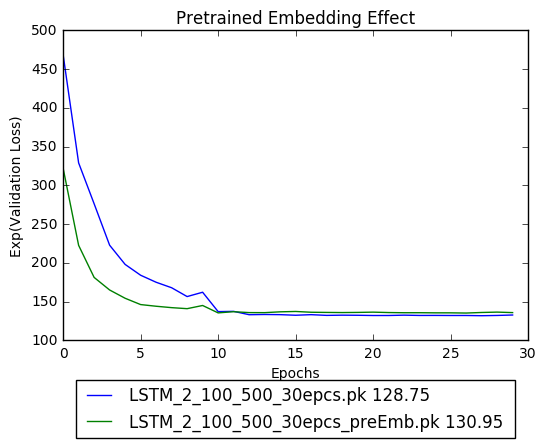

In [92]:
valHist('comparisons/','Pretrained Embedding Effect')

# Parameter Tunning: Dropout

In [2]:
%%writefile grid_dropout.py
import os
emsize = 300
nhid = 300
nlayer = 2
epochs = 30
model = 'LSTM'
for pdropout in np.arange(0.5,1,0.1):
    save_path = '../../datasets/%s_%s_%s_%s_%sepcs_%sdrop.pt' %(model,nlayer,emsize,nhid,epochs,pdropout)
    info_path = '../../datasets/%s_%s_%s_%s_%sepcs_%sdrop.pk' %(model,nlayer,emsize,nhid,epochs,pdropout)
    cmdLine = 'python main.py --cuda --pdropout %s --epochs %s --batch-size 200 --model %s --nlayers %s --emsize %s --nhid %s\
    --save %s --infopath %s'%(pdropout,epochs,model,nlayer,emsize,nhid,save_path,info_path)
    print(cmdLine)
    os.system(cmdLine)

Writing grid_dropout.py


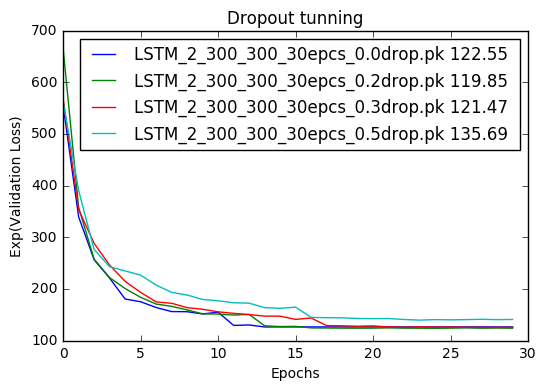

In [11]:
valHist('../../datasets/Dropout_tunning/','Dropout tunning',save=True)

# Parameter Tunning: Sequence Length

In [13]:
%%writefile grid_bptt.py
import os
for bptt in np.arange(20,45,5):
    save_path = '../../datasets/$sbptt.pt' %(bptt)
    info_path = '../../datasets/%sbptt.pk' %(bptt)
    cmdLine = 'python main.py --cuda --save %s --infopath %s'%(model,nlayer,emsize,nhid,save_path,info_path)
    print(cmdLine)
    os.system(cmdLine)

Writing grid_bptt.py


In [6]:
# Load outputed info_dict
def valHist(directory,title='Validation Loss History',save=False,legend_out = False):
    files_list = os.listdir(directory)
    for filename in files_list:
        filepath = directory+filename
        with open(filepath,'rb') as f:
            info_dict = pickle.load(f)
            val_loss_hist = np.exp(info_dict['val_losses'])
            test_loss = np.exp(info_dict['test_losses'][0])
            plt.plot(np.arange(len(val_loss_hist)),val_loss_hist,label=filename+' %.2f '%(test_loss))
    plt.xlabel('Epochs')
    plt.ylabel('Exp(Validation Loss)')
    #plt.xlim([0,30])
    #plt.ylim([120,180])
    plt.legend(loc='best')
    if legend_out:
        pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
    plt.title(title)
    if save:
        plt.savefig('%s.png'%(title))
    plt.show()
    return 

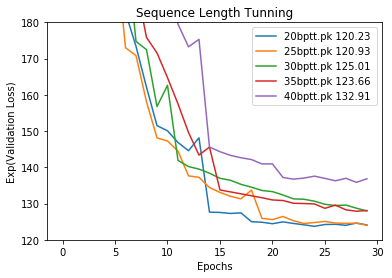

In [5]:
valHist('../../datasets/bptt_tunning/','Sequence Length Tunning',save=False)

# Parameter Tunning : Tied Grid

In [9]:
%%writefile grid_tied.py
import os
emb_hid_sizes = [100,300,500,1000,1500]
epochs = 30
bptts = [20,25,30,35]
for size in emb_hid_size:
    for bptt in bptts:
        save_path = '../../datasets/saved_models/%s_%s.pt' %(size,bptt)
        info_path = '../../datasets/info_dict/%s_%s.pk' %(size,bptt)
        cmdLine = 'python main.py --cuda --tied --batch-size 200 --bptt %s --emsize %s --nhid %s\
        --save %s --infopath %s'%(bptt,model,size,size,save_path,info_path)
        print(cmdLine)
        os.system(cmdLine)

Overwriting grid_tied.py


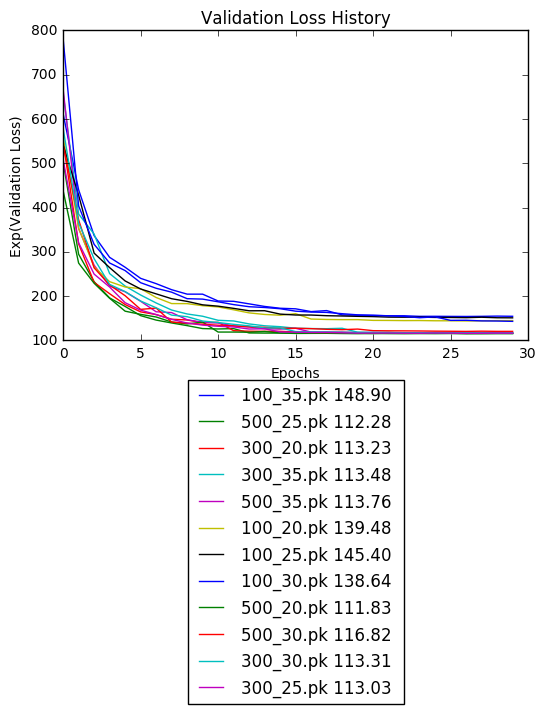

In [7]:
valHist('../../datasets/Grid_tied/',legend_out=True)

In [8]:
with open('../../datasets/Grid_tied/100_20.pk','rb') as f:
    test_info_dict = pickle.load(f)

In [17]:
args.

TypeError: 'Namespace' object is not subscriptable

In [16]:
import pandas as pd

In [18]:
vars(args)

{'batch_size': 200,
 'bptt': 20,
 'clip': 0.5,
 'cuda': True,
 'data': './data/penn',
 'emsize': 100,
 'epochs': 30,
 'infopath': '../../datasets/info_dict/100_20.pk',
 'log_interval': 200,
 'lr': 20,
 'model': 'LSTM',
 'nhid': 100,
 'nlayers': 2,
 'pdropout': 0.2,
 'save': '../../datasets/saved_models/100_20.pt',
 'seed': 1111,
 'tied': True}

In [40]:
args = vars(test_info_dict['args'])
parameters = ['emsize','nhid','tied','lr','pdropout']
row=[]
for parameter in parameters:
    row.append(args[parameter])
args.get('emsize')

100

In [72]:
def grid_result(directory):
    files_list = os.listdir(directory)
    parameters = ['emsize','nhid','tied','lr','pdropout','clip']
    results = pd.DataFrame(columns=parameters)
    test_ppl = []
    for filename in files_list:
        filepath = directory+filename
        row = []
        with open(filepath,'rb') as f:
            info_dict = pickle.load(f)
            args = vars(info_dict['args'])
            test_ppl.append(np.exp(info_dict['test_losses'][0]))
            for parameter in parameters:
                row.append(args[parameter])
            row=pd.DataFrame([row],columns=parameters)
            results=results.append(row)
    results['ppl_test'] = test_ppl
    return results
            

In [73]:
grid_result('../../datasets/Grid_tied/')

,emsize,nhid,tied,lr,pdropout,clip,ppl_test
0,1000.0,1000.0,True,20.0,0.2,0.5,121.445402
0,100.0,100.0,True,20.0,0.2,0.5,148.899308
0,500.0,500.0,True,20.0,0.2,0.5,112.281596
0,300.0,300.0,True,20.0,0.2,0.5,113.231538
0,300.0,300.0,True,20.0,0.2,0.5,113.477347
0,500.0,500.0,True,20.0,0.2,0.5,113.763955
0,100.0,100.0,True,20.0,0.2,0.5,139.476241
0,100.0,100.0,True,20.0,0.2,0.5,145.399820
0,1000.0,1000.0,True,20.0,0.2,0.5,117.098482
0,100.0,100.0,True,20.0,0.2,0.5,138.644271
